In [1]:
import pandas as pd 
import numpy as np
import math
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform, pdist
import plotly.express as px
import sys, distutils, os

np.random.seed(1234)

sys.argv[1]  = "test_plots_data"

def make_piecharts(data_df, n_rows, n_cols, fig_title):
    specs_list = []
    subplot_coordinate = []
    for x in range(n_rows):
        temp_spec_list = []
        for  y in range(n_cols):
            temp_spec_list.append({"type": "bar"})
            subplot_coordinate.append([x+1, y+1])
        specs_list.append(temp_spec_list)

        
    fig = make_subplots(rows=n_rows, cols=n_cols, specs=specs_list, subplot_titles= list(data_df["sample"]))
    for i in range(data_df.shape[0]):
        df = pd.DataFrame(data_df.iloc[i,1:])
        sample_name = data_df.iloc[i,:][0]
        df.rename( columns={i : sample_name}, inplace = True)
        fig.add_trace(go.Bar(x=list(df[sample_name].index), y= df[sample_name].values), subplot_coordinate[i][0] , subplot_coordinate[i][1] )
    fig_width = data_df.shape[0] * 600
    fig_height = 600
    fig.update_layout(width = fig_width, height = fig_height, title_text=fig_title, showlegend=False)
    return fig


def add_scatterplot_layer(data_df, _color , fig ): 
    try:
        data_df["sample"] = [ i.split("_")[0].split(".")[0] for i in data_df["sample"]]
    except:
        pass
    for i in range(len(data_df)):
        fig.add_trace(go.Scatter( name = data_df.iloc[i]["sample"] , legendgroup=data_df.iloc[i]["sample"] ,  marker=dict(color= _color), x = data_df.columns[1:], y = data_df.iloc[i, 1:], mode='markers') )

r_output_file_dir = sys.argv[1] + "/MetaMutationalResults"
# r_output_file_dir = "MetaMutationalResults"



In [2]:
sigfit = True
sigflow = True 
deconstructSigs= True 
mutationalPattern = True

legacy_df_list = []
legacy_df_name_list = []
if sigflow:
    sigflow_legacy_exposure_df = pd.read_csv(r_output_file_dir + "/sigflow/legacy_fitting_relative_exposure.csv")
    pie_chart_rows = math.ceil(sigflow_legacy_exposure_df.shape[0] / 3) 
    pie_chart_cols = 3
    rows = math.ceil(sigflow_legacy_exposure_df.shape[0] / 6)
    columns = 6

    sigflow_legacy_exposure_df_fig = make_piecharts(sigflow_legacy_exposure_df, pie_chart_rows, pie_chart_cols, "COSMIC V2 'Legacy' exposures data Sigflow")    
    legacy_df_list.append(sigflow_legacy_exposure_df.sort_values(by=["sample"]))
    legacy_df_name_list.append("sigflow")
if mutationalPattern:
    mutationalPatterns_legacy_exposure_df = pd.read_csv(r_output_file_dir + "/mutational_patterns_results/legacy_sample_exposures.csv")
    mutationalPatterns_legacy_exposure_df = mutationalPatterns_legacy_exposure_df.rename(columns={"Unnamed: 0": "sample"})
    mutationalPatterns_legacy_exposure_df.set_index("sample", inplace = True)
    mutationalPatterns_legacy_exposure_df = mutationalPatterns_legacy_exposure_df.div(mutationalPatterns_legacy_exposure_df.sum(axis=1), axis=0)
    mutationalPatterns_legacy_exposure_df.reset_index(inplace= True)
    pie_chart_rows = math.ceil(mutationalPatterns_legacy_exposure_df.shape[0] / 3) 
    pie_chart_cols = 3
    rows = math.ceil(mutationalPatterns_legacy_exposure_df.shape[0] / 6)
    columns = 6

    mutationalPatterns_strict_legacy_exposure_df = pd.read_csv(r_output_file_dir + "/mutational_patterns_results/legacy_strict_sample_exposures.csv")
    mutationalPatterns_strict_legacy_exposure_df = mutationalPatterns_strict_legacy_exposure_df.rename(columns={"Unnamed: 0": "sample"})
    mutationalPatterns_strict_legacy_exposure_df.set_index("sample", inplace = True)
    mutationalPatterns_strict_legacy_exposure_df = mutationalPatterns_strict_legacy_exposure_df.div(mutationalPatterns_strict_legacy_exposure_df.sum(axis=1), axis=0)
    mutationalPatterns_strict_legacy_exposure_df.reset_index(inplace= True)

    mutationalPatters_legacy_fig = make_piecharts(mutationalPatterns_legacy_exposure_df, pie_chart_rows, pie_chart_cols, "COSMIC V2 'Legacy' exposures  data MutationalPatterns")    
    mutationalPatters_strict_legacy_fig = make_piecharts(mutationalPatterns_strict_legacy_exposure_df, pie_chart_rows, pie_chart_cols, "COSMIC V2 'Legacy' exposures data MutationalPatterns Strict")                
    legacy_df_list.append(mutationalPatterns_legacy_exposure_df.sort_values(by=["sample"]))
    legacy_df_name_list.append("mutationalPatterns")
    legacy_df_list.append(mutationalPatterns_strict_legacy_exposure_df.sort_values(by=["sample"]))
    legacy_df_name_list.append("mutationalPatterns_strict")
if deconstructSigs:
    deconstructSigs_legacy_exposure_df = pd.read_csv(r_output_file_dir + "/deconstructsigs_results/legacy_sample_exposures.csv")
    deconstructSigs_legacy_exposure_df.rename( columns = {"Unnamed: 0": "sample"}, inplace= True)
    pie_chart_rows = math.ceil(deconstructSigs_legacy_exposure_df.shape[0] / 3) 
    pie_chart_cols = 3
    rows = math.ceil(deconstructSigs_legacy_exposure_df.shape[0] / 6)
    columns = 6

    deconstructSigs_legacy_exposure_df_fig = make_piecharts(deconstructSigs_legacy_exposure_df, pie_chart_rows, pie_chart_cols, "COSMIC V2 'Legacy' exposures data DeconstructSigs")    

    legacy_df_list.append(deconstructSigs_legacy_exposure_df.sort_values(by=["sample"]))
    legacy_df_name_list.append("deconstructSigs")
if sigfit:
    sigfit_legacy_exposure_df = pd.read_csv(r_output_file_dir + "/sigfit_results/sample_exposures_legacy.csv")
    sigfit_legacy_exposure_df.rename(columns={"Unnamed: 0": "sample" }, inplace= True)
    sigfit_legacy_exposure_df.columns = ["sample"] +  [ "COSMIC_" + i.split(".")[-1] for i in sigfit_legacy_exposure_df.columns[1:]]
    pie_chart_rows = math.ceil(sigfit_legacy_exposure_df.shape[0] / 3) 
    pie_chart_cols = 3
    rows = math.ceil(sigfit_legacy_exposure_df.shape[0] / 6)
    columns = 6

    sigfit_legacy_exposure_df_fig = make_piecharts(sigfit_legacy_exposure_df, pie_chart_rows, pie_chart_cols, "COSMIC V2 'Legacy' exposures  data Sigfit")    
    legacy_df_list.append(sigfit_legacy_exposure_df.sort_values(by=["sample"]))
    legacy_df_name_list.append("sigfit")

with open(r_output_file_dir + '/legacy_pie_charts.html', 'a') as f:
    if sigflow:
        f.write(sigflow_legacy_exposure_df_fig.to_html(full_html=False, include_plotlyjs='cdn'))
    if mutationalPattern:
        f.write(mutationalPatters_legacy_fig.to_html(full_html=False, include_plotlyjs='cdn'))
        f.write(mutationalPatters_strict_legacy_fig.to_html(full_html=False, include_plotlyjs='cdn'))
    if sigfit:
        f.write(sigfit_legacy_exposure_df_fig.to_html(full_html=False, include_plotlyjs='cdn'))
    if deconstructSigs:
        f.write(deconstructSigs_legacy_exposure_df_fig.to_html(full_html=False, include_plotlyjs='cdn'))

with open('uploads/MetaMutationalResults/legacy_pie_charts.html', 'a') as f:
    if sigflow:
        f.write(sigflow_legacy_exposure_df_fig.to_html(full_html=False, include_plotlyjs='cdn'))
    if mutationalPattern:
        f.write(mutationalPatters_legacy_fig.to_html(full_html=False, include_plotlyjs='cdn'))
        f.write(mutationalPatters_strict_legacy_fig.to_html(full_html=False, include_plotlyjs='cdn'))
    if sigfit:
        f.write(sigfit_legacy_exposure_df_fig.to_html(full_html=False, include_plotlyjs='cdn'))
    if deconstructSigs:
        f.write(deconstructSigs_legacy_exposure_df_fig.to_html(full_html=False, include_plotlyjs='cdn'))


        
# distance_df_list = []
# for i in range(legacy_df_list[0].shape[0]):
#     temp_df = []
#     for index , j in enumerate(legacy_df_list):
#         j.iloc[i,0] = legacy_df_name_list[index]
#         temp_df.append(list(j.iloc[i,:]))
#     _df = pd.DataFrame(temp_df, columns = legacy_df_list[0].columns)
#     _df.fillna(0, inplace = True)
#     distance_df_list.append(_df)




In [3]:


# print(legacy_df_list[0])

distance_df_list = []
for i in range(legacy_df_list[0].shape[0]):
    temp_df = []
    print(i)
    for index , j in enumerate(legacy_df_list):
        print(index)
        j.iloc[i,0] = legacy_df_name_list[index]
        temp_df.append(list(j.iloc[i,:]))
    _df = pd.DataFrame(temp_df, columns = legacy_df_list[0].columns)
    _df.fillna(0, inplace = True)
    distance_df_list.append(_df)

# legacy_df_list[0]
    

0
0
1
2
3
4
1
0
1
2
3
4
2
0
1
2
3
4


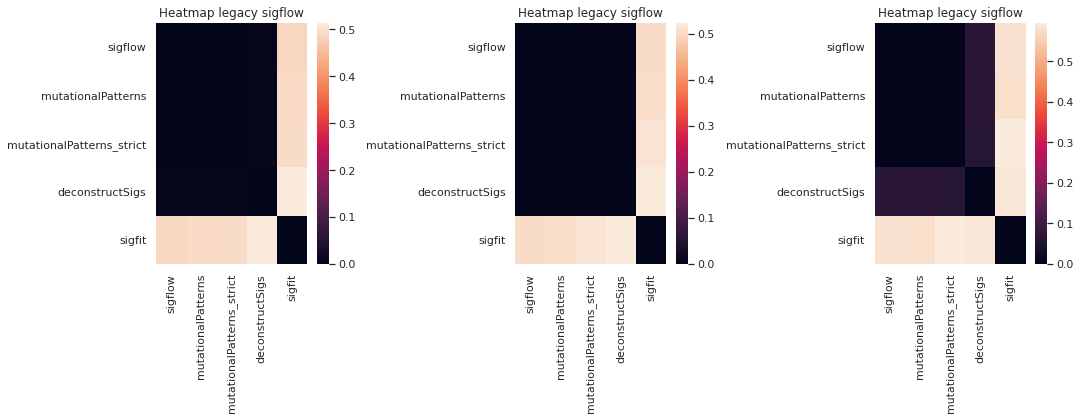

In [6]:
distance_df_list = []
for i in range(legacy_df_list[0].shape[0]):
    temp_df = []
    for index , j in enumerate(legacy_df_list):
        print(index)
        j.iloc[i,0] = legacy_df_name_list[index]
        temp_df.append(list(j.iloc[i,:]))
    _df = pd.DataFrame(temp_df, columns = legacy_df_list[0].columns)
    _df.fillna(0, inplace = True)
    distance_df_list.append(_df)

fig = plt.figure(figsize=(10 * len(distance_df_list) , 2 * len(distance_df_list) ))
# fig.subplots_adjust(hspace=2, wspace=2)
for i in range(len(distance_df_list)):
    df = distance_df_list[i]
    df__ = pd.DataFrame(squareform(pdist(df.iloc[:, 1:] , metric= "cosine")), columns=df["sample"].unique(), index=df["sample"].unique())
    sns.set()
    ax = fig.add_subplot(rows, columns, i+1)    
    sns.heatmap(df__)
    plt.tight_layout()
    plt.title("Heatmap legacy " + legacy_df_list[0].iloc[i,0] )
plt.savefig(r_output_file_dir + "/Heatmap_legacy.svg")

plt.savefig( "uploads/MetaMutationalResults/Heatmap_legacy.png", bbox_inches='tight')

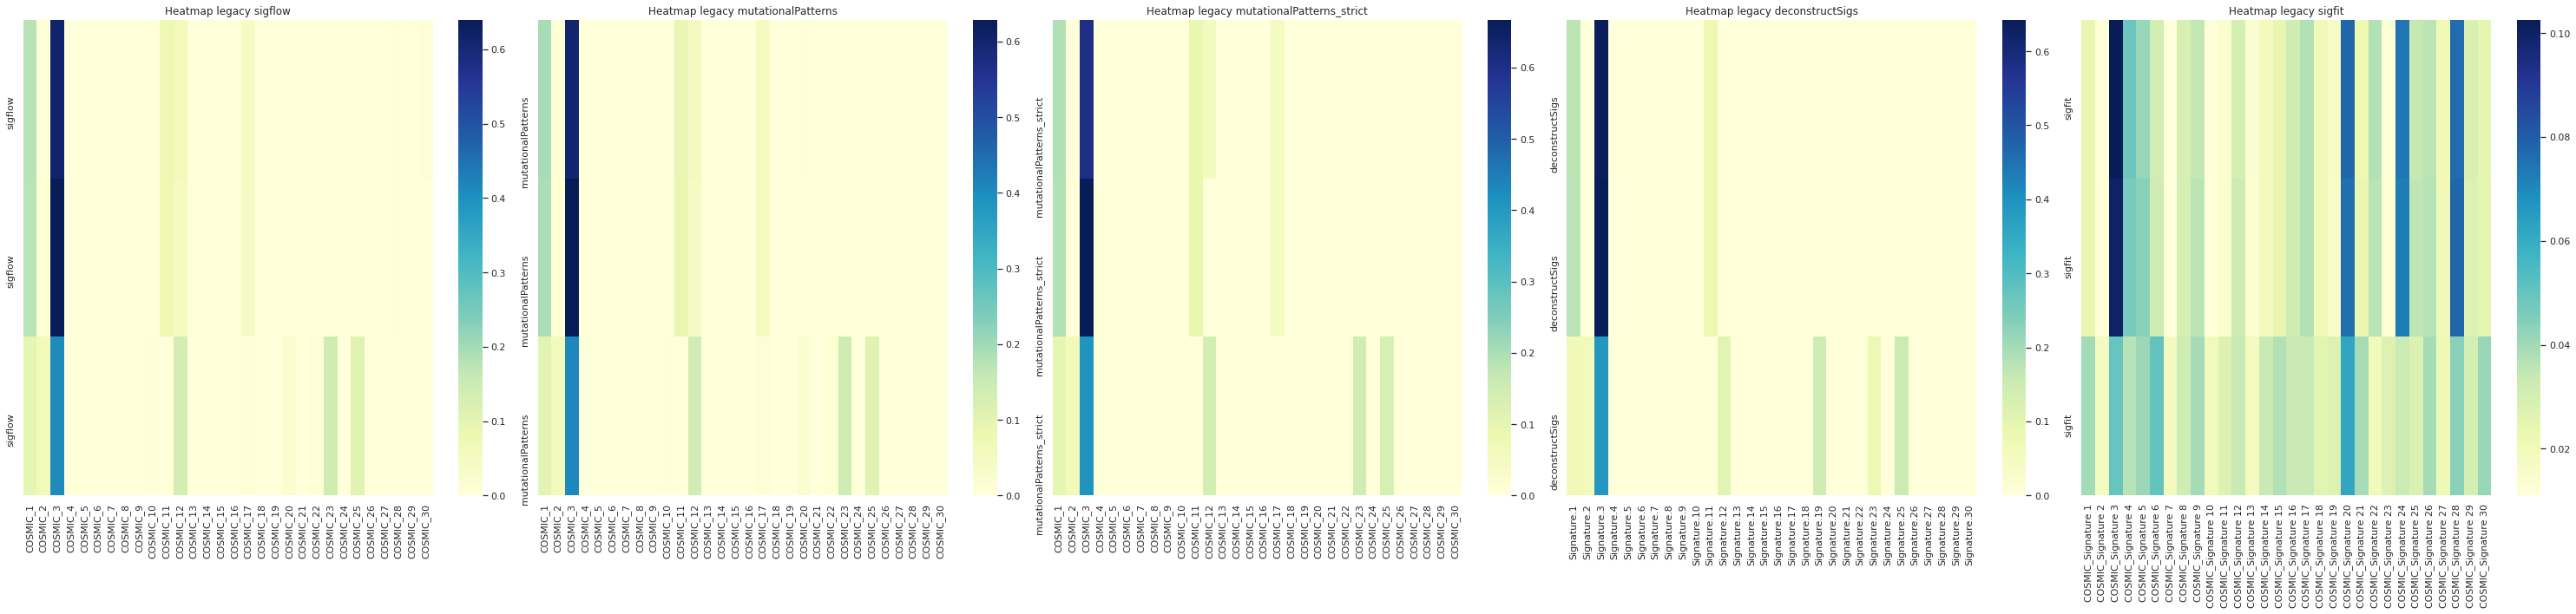

In [7]:
fig = plt.figure(figsize=(50, 10 ))
# fig.subplots_adjust(right = 0.9, wspace=.01)
for i in range(len(legacy_df_list)):
    df = legacy_df_list[i]
    sns.set()
    ax = fig.add_subplot(rows, columns, i+1)    
    sns.heatmap(df.set_index("sample") , cmap="YlGnBu" , xticklabels = True, yticklabels= True)
    sns.set(rc={'figure.figsize':(10, 10)})
    ax.set_ylabel('')
    plt.title("Heatmap legacy " + legacy_df_name_list[i] )
    plt.tight_layout()
plt.savefig(r_output_file_dir + "/Heatmap_exposures_all_sigs_legacy.svg", bbox_inches='tight')

plt.savefig("uploads/MetaMutationalResults/Heatmap_exposures_all_sigs_legacy.png", bbox_inches='tight')

In [8]:
sbs_df_list = []    
sbs_df_name_list = []
if sigflow:
    sigflow_sbs_exposure_df = pd.read_csv(r_output_file_dir + "/sigflow/SBS_fitting_relative_exposure.csv")
    pie_chart_rows = math.ceil(sigflow_sbs_exposure_df.shape[0] / 3) 
    pie_chart_cols = 3
    rows = math.ceil(sigflow_sbs_exposure_df.shape[0] / 6) 
    columns = 6

    sigflow_sbs_exposure_df_fig = make_piecharts(sigflow_sbs_exposure_df, pie_chart_rows, pie_chart_cols, "COSMIC V3 'SBS' exposures data Sigflow")   
    sbs_df_list.append(sigflow_sbs_exposure_df.sort_values(by=["sample"]))
    sbs_df_name_list.append("sigflow")
if mutationalPattern:
    mutationalPatterns_sbs_exposure_df = pd.read_csv(r_output_file_dir + "/mutational_patterns_results/sample_exposures.csv")
    mutationalPatterns_sbs_exposure_df = mutationalPatterns_sbs_exposure_df
    mutationalPatterns_sbs_exposure_df.rename(columns={"Unnamed: 0": "sample"}, inplace = True)
    mutationalPatterns_sbs_exposure_df.set_index("sample", inplace = True)
    mutationalPatterns_sbs_exposure_df = mutationalPatterns_sbs_exposure_df.rename(columns={"index": "sample"})
    mutationalPatterns_sbs_exposure_df.sum(axis=1)
    mutationalPatterns_sbs_exposure_df = mutationalPatterns_sbs_exposure_df.div(mutationalPatterns_sbs_exposure_df.sum(axis=1), axis=0)
    mutationalPatterns_sbs_exposure_df.reset_index(inplace= True)

    mutationalPatterns_strict_sbs_exposure_df = pd.read_csv(r_output_file_dir + "/mutational_patterns_results/strict_sample_exposures.csv")
    mutationalPatterns_strict_sbs_exposure_df = mutationalPatterns_strict_sbs_exposure_df
    mutationalPatterns_strict_sbs_exposure_df.rename(columns={"Unnamed: 0": "sample"}, inplace = True)
    mutationalPatterns_strict_sbs_exposure_df.set_index("sample", inplace = True)
    mutationalPatterns_strict_sbs_exposure_df = mutationalPatterns_strict_sbs_exposure_df.rename(columns={"index": "sample"})
    mutationalPatterns_strict_sbs_exposure_df.sum(axis=1)
    mutationalPatterns_strict_sbs_exposure_df.div(mutationalPatterns_strict_sbs_exposure_df.sum(axis=1), axis=0)
    mutationalPatterns_strict_sbs_exposure_df.reset_index(inplace= True)

    pie_chart_rows = math.ceil(mutationalPatterns_sbs_exposure_df.shape[0] / 3) 
    pie_chart_cols = 3
    rows = math.ceil((mutationalPatterns_sbs_exposure_df.shape[0] / 6) )
    columns = 6

    sbs_mutational_patters_fig = make_piecharts(mutationalPatterns_sbs_exposure_df, pie_chart_rows, pie_chart_cols, "COSMIC V3 'SBS' exposures  data MutationalPatterns")    
    sbs_mutational_patters_strict_fig = make_piecharts(mutationalPatterns_strict_sbs_exposure_df, pie_chart_rows, pie_chart_cols, "COSMIC V3 'SBS' exposures data MutationalPatterns Strict")    
    sbs_df_list.append(mutationalPatterns_strict_sbs_exposure_df.sort_values(by=["sample"]))
    sbs_df_name_list.append("mutationalPatterns_strict")
    sbs_df_list.append(mutationalPatterns_sbs_exposure_df.sort_values(by=["sample"]))
    sbs_df_name_list.append("mutationalPatterns")
if deconstructSigs:
    deconstructSigs_sbs_exposure_df = pd.read_csv(r_output_file_dir + "/deconstructsigs_results/sbs_sample_exposures.csv")
    deconstructSigs_sbs_exposure_df.rename( columns = {"Unnamed: 0": "sample"}, inplace= True)
    pie_chart_rows = math.ceil(deconstructSigs_sbs_exposure_df.shape[0] / 3) 
    pie_chart_cols = 3
    rows = math.ceil(deconstructSigs_sbs_exposure_df.shape[0] / 6) 
    columns = 6

    deconstructSigs_sbs_exposure_df_fig = make_piecharts(deconstructSigs_sbs_exposure_df, pie_chart_rows, pie_chart_cols, "COSMIC V3 'SBS' exposures data DeconstructSigs")    
    sbs_df_list.append(deconstructSigs_sbs_exposure_df.sort_values(by=["sample"]))
    sbs_df_name_list.append("deconstructSigs")            
if sigfit:
    sigfit_sbs_exposure_df = pd.read_csv(r_output_file_dir + "/sigfit_results/sample_exposures_sbs.csv")
    sigfit_sbs_exposure_df.rename(columns={"Unnamed: 0": "sample" }, inplace= True)
    pie_chart_rows = math.ceil(sigfit_sbs_exposure_df.shape[0] / 3) 
    pie_chart_cols = 3
    rows = math.ceil(sigfit_sbs_exposure_df.shape[0] / 6) 
    columns = 6

    sigfit_sbs_exposure_df_fig = make_piecharts(sigfit_sbs_exposure_df, pie_chart_rows, pie_chart_cols, "COSMIC V3 'SBS' exposures data Sigfit")   
    sbs_df_list.append(sigfit_sbs_exposure_df.sort_values(by=["sample"]))
    sbs_df_name_list.append("sigfit")        
with open(r_output_file_dir + '/sbs_pie_charts.html', 'a') as f:
    if sigflow:
        f.write(sigflow_sbs_exposure_df_fig.to_html(full_html=False, include_plotlyjs='cdn'))
    if mutationalPattern:
        f.write(sbs_mutational_patters_fig.to_html(full_html=False, include_plotlyjs='cdn'))        
        f.write(sbs_mutational_patters_strict_fig.to_html(full_html=False, include_plotlyjs='cdn'))           
    if sigfit:
        f.write(sigfit_sbs_exposure_df_fig.to_html(full_html=False, include_plotlyjs='cdn'))
    if deconstructSigs:
        f.write(deconstructSigs_sbs_exposure_df_fig.to_html(full_html=False, include_plotlyjs='cdn'))


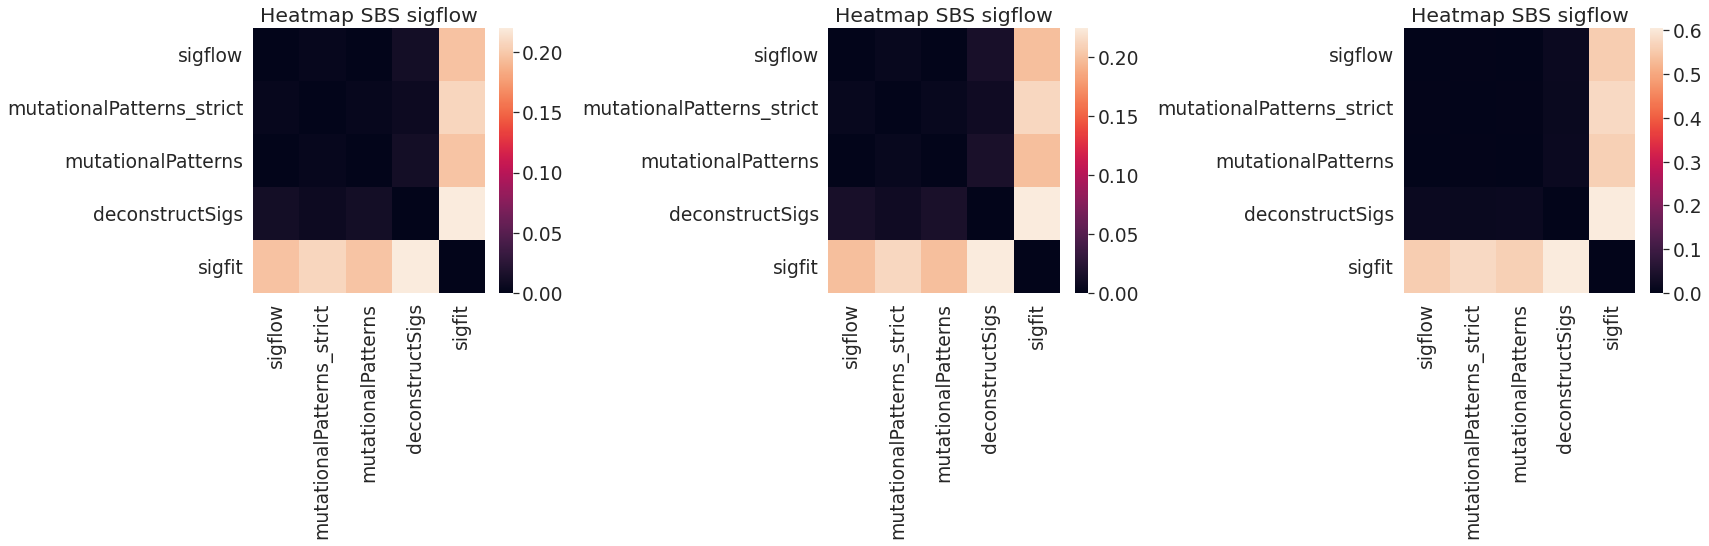

In [11]:
distance_df_list = []
for i in range(sbs_df_list[0].shape[0]):
    temp_df = []
    for index , j in enumerate(sbs_df_list):
        j["sample"] = sbs_df_name_list[index]
        temp_df.append(list(j.iloc[i,:]))
    _df = pd.DataFrame(temp_df, columns = sbs_df_list[0].columns)
    _df.fillna(0, inplace= True)
    distance_df_list.append(_df)

fig = plt.figure(figsize=(16 * len(distance_df_list) , 8 ))
sns.set(font_scale=1.7)
for i in range(len(distance_df_list)):  
    df = distance_df_list[i]
    df_ = pd.DataFrame(squareform(pdist(df.iloc[:, 1:] , metric= "cosine") ), columns=df["sample"].unique(), index=df["sample"].unique())
    ax = fig.add_subplot(rows, columns, i+1)    
    sns.heatmap(df_)
    plt.tight_layout()
    plt.title("Heatmap SBS " + str(sbs_df_list[0].iloc[i,0]))

plt.savefig(r_output_file_dir + "/Heatmap_SBS.svg", bbox_inches='tight')
plt.savefig(r_output_file_dir + "/Heatmap_SBS.png", bbox_inches='tight')


In [ ]:
# mutationalPattern_input = sys.argv[2] == "TRUE"
# sigflow_input =  sys.argv[3] == "TRUE"
# sigfit_input = sys.argv[4] == "TRUE"
# deconstructSigs_input =  sys.argv[5] == "TRUE"


mutationalPattern_input =  "TRUE"
sigflow_input =   "TRUE"
sigfit_input =  "TRUE"
deconstructSigs_input =  "TRUE"

if os.path.exists(sys.argv[1] + "/output/SBS/MetaMutationalSigs.SBS96.all"):
    run_legacy(sigfit_input, sigflow_input, deconstructSigs_input , mutationalPattern_input )
    run_sbs(sigfit_input, sigflow_input, deconstructSigs_input , mutationalPattern_input)
if os.path.exists(sys.argv[1] + "/output/ID/MetaMutationalSigs.ID83.all"):
    run_id(sigfit_input, sigflow_input, deconstructSigs_input , mutationalPattern_input)
if os.path.exists(sys.argv[1] + "/output/DBS/MetaMutationalSigs.DBS78.all"):
    run_dbs(sigfit_input, sigflow_input, deconstructSigs_input , mutationalPattern_input)